In [125]:
%matplotlib inline
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import SpikeUnit
import SpikeFilter as SF

In [187]:
reload(SF)
reload(SU)
marker, neurons = SU.readin_electrode_data(
    session='V1_180329_GBL', 
    mouse_id="ts5", 
    data_dir="../../data/TuningCurve/NEX_TRAIN/")
marker.grouped_marker.keys(), neurons

(dict_keys(['L7#7', 'L6#8', 'L2#2', 'B4', 'L2#7', 'L6#2', 'L2#3', 'G8', 'L3#8', 'L8#5', 'L5#4', 'B3', 'L8#1', 'L6#4', 'B7', 'L5#2', 'G7', 'L5#8', 'L2#5', 'L6#1', 'L8#7', 'L8#4', 'B1', 'G1', 'G5', 'L7#3', 'L1#2', 'L3#5', 'L4#3', 'L5#3', 'L6#5', 'L4#8', 'L5#7', 'L1#3', 'L7#5', 'L1#4', 'L3#1', 'L8#2', 'L8#3', 'L7#6', 'G3', 'B2', 'G6', 'L4#2', 'L2#6', 'L4#5', 'L7#4', 'L4#6', 'L4#7', 'L5#5', 'L1#8', 'L8#8', 'B8', 'L3#6', 'L3#7', 'L7#1', 'L6#7', 'G4', 'L1#6', 'L6#3', 'L8#6', 'L2#1', 'L2#4', 'L4#1', 'L5#6', 'L3#2', 'L7#2', 'L1#1', 'B5', 'G2', 'L7#8', 'L1#5', 'L4#4', 'L2#8', 'L6#6', 'L5#1', 'B6', 'L3#4', 'L3#3', 'L1#7']),
 {'WBC08a': <SpikeUnit.SpikeUnit at 0x11054f8d0>,
  'WBC08b': <SpikeUnit.SpikeUnit at 0x11054f908>,
  'WBC12a': <SpikeUnit.SpikeUnit at 0x11054f940>,
  'WBC16a': <SpikeUnit.SpikeUnit at 0x11054f978>,
  'WBC16b': <SpikeUnit.SpikeUnit at 0x11054f9b0>})

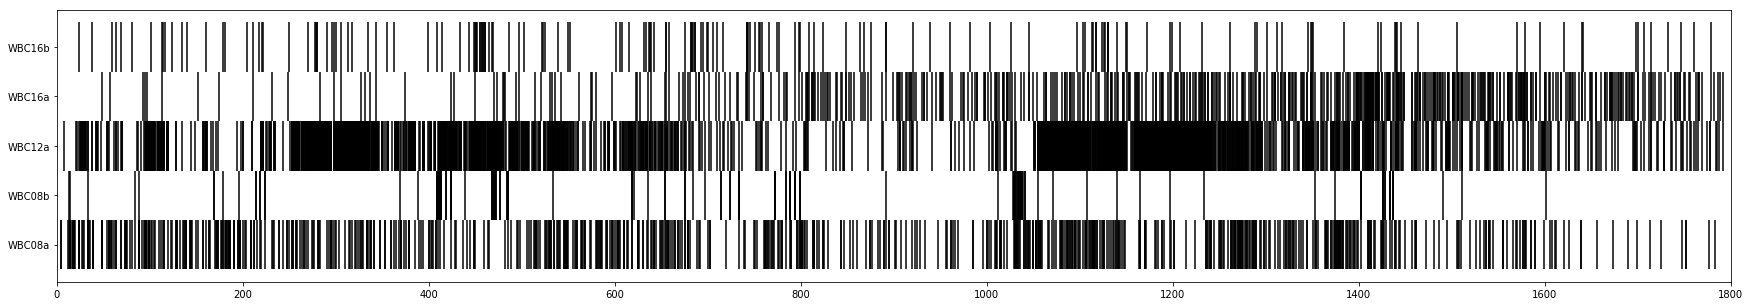

In [178]:
def plotSpikeTrains(spiketrain_dict, marker, size=(100,5), window=(0,1800), withMarker=True):
    plt.figure(figsize=size)
    idx = 0
    for (name, neuron) in spiketrain_dict.items():
        plt.vlines(neuron.spike_train, idx-0.5, idx+0.5)
        idx += 1
    if withMarker:
        plt.vlines(marker.get_marker_time_series(), -0.5, idx-0.5, color='r', alpha=0.4)
    plt.yticks(np.arange(len(spiketrain_dict)),tuple(neurons.keys()))
    plt.xlim(window)
    return

plotSpikeTrains(neurons, marker, size=(30,5), window=(0,1800),withMarker=False)
plt.show()

guassian: $$w(\tau) = \frac{1}{\sigma_w \sqrt{2 \pi}}
\exp(- \frac{\tau^2}{2 \sigma_w^2})$$

causal: $$ w(\tau) = [\alpha^2 \tau \exp(- \alpha \tau)]_+ $$

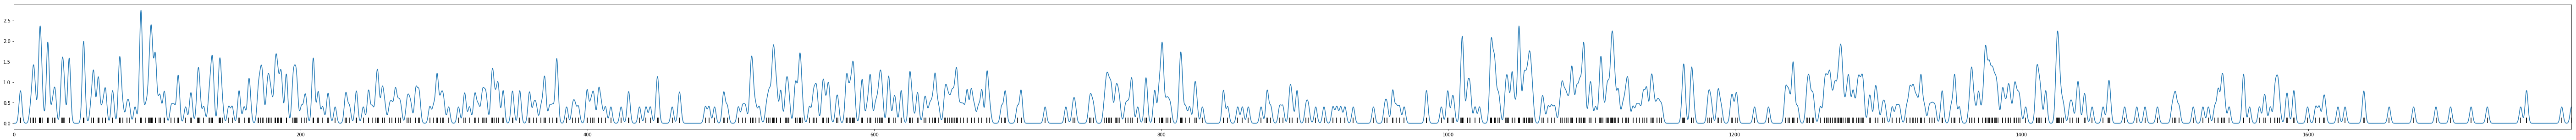

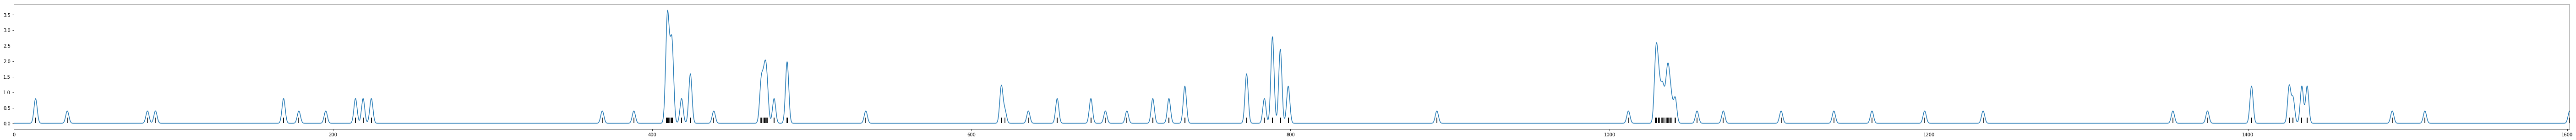

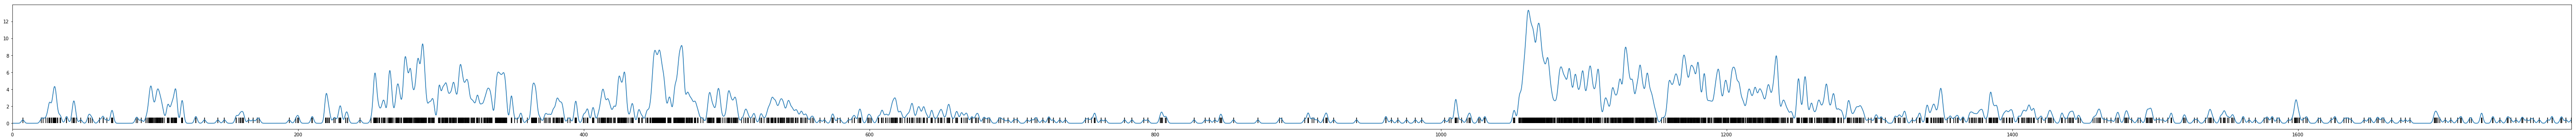

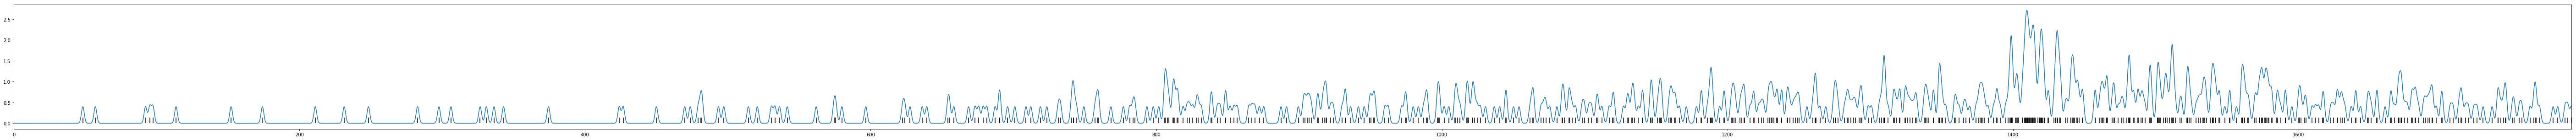

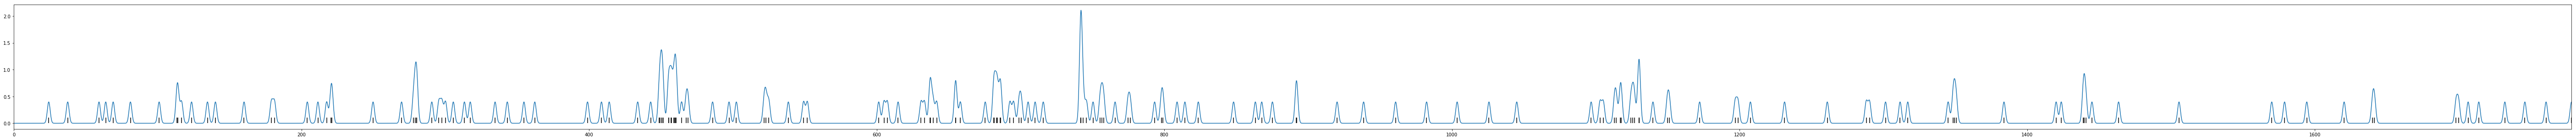

In [189]:
def plot_spike_train_with_filter(neuron, kernel, size=(100,5), window=None, marker=None):
    X, Y = SF.apply_linear_filter(to=neuron, kernel=kernel)
    plt.figure(figsize=size)
    plt.plot(X, Y)
    if marker:
        plt.vlines(marker.get_marker_time_series(), - max(Y)/20, 0, color='r')
    window = window if window else (0,max(X))
    plt.xlim(window)
    plt.vlines(neuron.spike_train,0,max(Y)/20)

    
    
def unit(neuron):
    plot_spike_train_with_filter(
        neuron, 
        kernel=SF.kernel('gaussian',sigma=1))
    plt.show()
    
list(map(unit, neurons.values()));

In [190]:
lf1 = SF.generate_linear_filter(neurons['WBC08b'], kernel=SF.kernel('gaussian',sigma=1))

In [206]:
def checking(linfilter, markpoints, windows=(-1, 4), steps=10000):
    result = np.zeros(steps)
    for each in markpoints:
        X = np.linspace(each-windows[0], each-windows[1], steps)
        result += np.array(list(map(linfilter, X)))
    return result / len(markpoints)

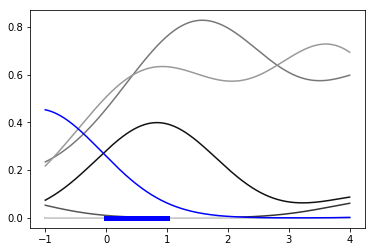

In [226]:
color_dict = {
    'B1':'#111111',
    'B2':'#333333',
    'B3':'#555555',
    'B4':'#777777',
    'B5':'#999999',
    'B6':'#bbbbbb',
    'B7':'#dddddd',
    'B8':'b'
}

def plotunit(name):
    Y = checking(lf1, marker.grouped_marker[name])
    plt.plot(np.linspace(-1,4,10000), Y,color=color_dict[name])
    plt.plot([0,1],[0,0], linewidth=5 , color='b')
    # plt.title(name)

list(map(plotunit, ['B1','B2','B3','B4','B5','B6','B7','B8']));
plt.show()